In [1]:
from evaluation import *
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

##  Build networkx graph from file

In [2]:
g = buildGraph(data_path, email)

Name: Email network
Type: Graph
Number of nodes: 1005
Number of edges: 16706
Average degree:  33.2458
Network density: 0.03311331787278746


## findClusters example

In [3]:
first_th = 0.08
second_th = 0.005

fps, fmap = findClusters(g, first_th)
print('clusters found: ' + str(len(fmap)))

merged_fps, merged_fmap = mergeFingerprints(fps, fmap, second_th)
print('clusters merged: ' + str(len(fmap)-len(merged_fmap)))
print('remaining clusters: ' + str(len(merged_fmap)))

clusters found: 50
clusters merged: 8
remaining clusters: 42


## Plot and save graph as png

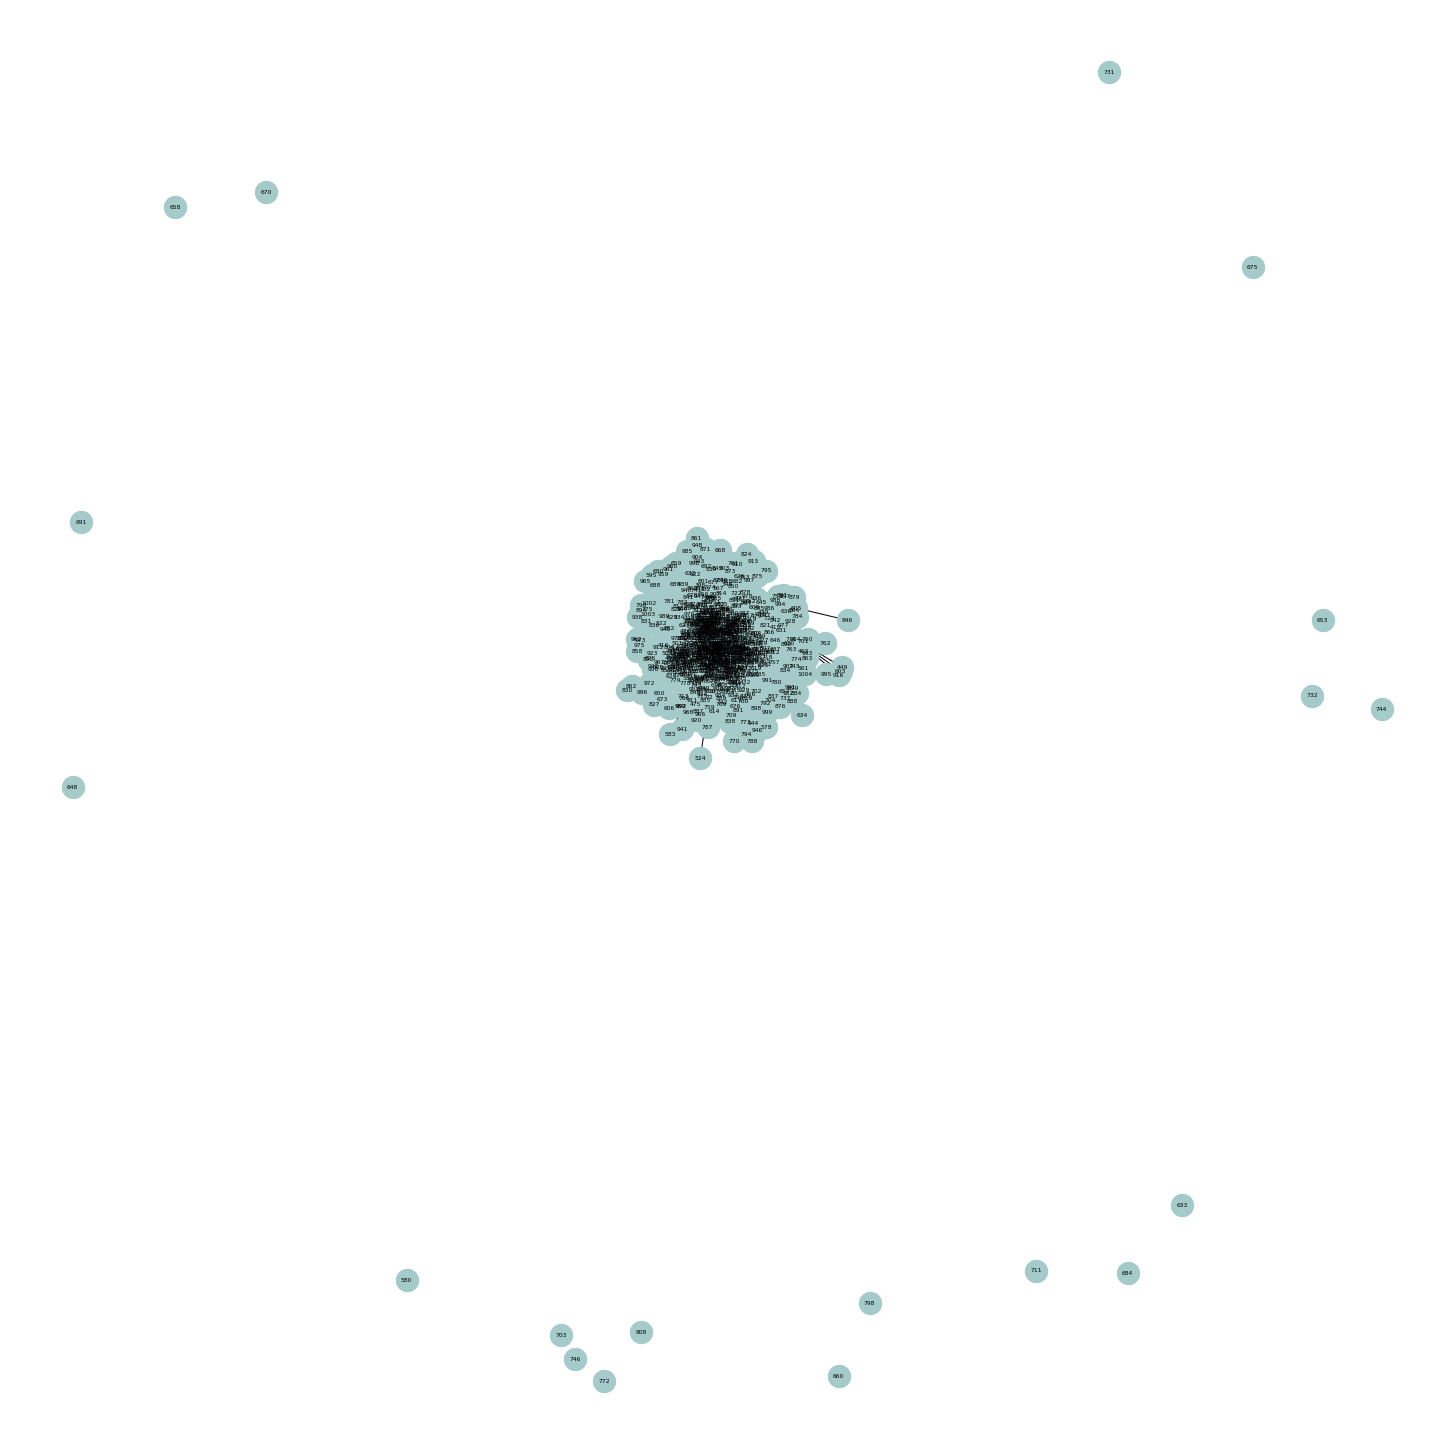

In [7]:
plotGraph(g, email)

## Calculate fitness scores

In [4]:
d = thresholdSearch(g, network_name = email, 
                    initial_start=0, initial_stop=0.5, initial_num=3, 
                    merging_start=0, merging_stop=1, merging_num=3, log=False)

100%|██████████| 4/4 [00:06<00:00,  1.69s/it]


In [3]:
# load scores (dict) from pkl file
with open(data_path + email + '.pkl', 'rb') as f:
    d = pickle.load(f)

In [4]:
# turn scores (dict) into dataframe
df = pd.DataFrame.from_dict(d, orient='index')

# sort by score to see best score
df = df.sort_values(by='score', ascending=False)
df.head()

,initial_threshold,merging_threshold,score,clusters_found,clusters_merged,remaining_clusters
0,0.25,0.5,0.288316,98,0,98
1,0.25,1.0,0.288316,98,0,98
2,0.50,0.5,0.112956,316,17,299
3,0.50,1.0,0.104989,316,0,316


## CDlib evaluation

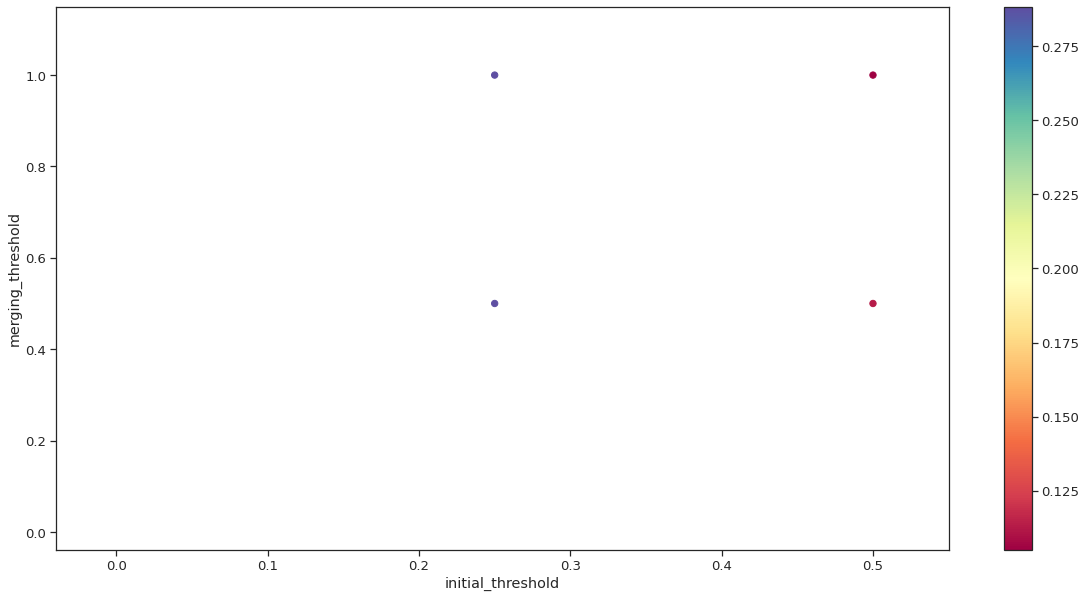

In [6]:
plotScores(df, email)

In [7]:
# email with Louvain
communities = louvain(g)
mod = evaluation.newman_girvan_modularity(g,communities)
mod.score

0.43215837750885905

In [5]:
# youtube with Louvain
communities = louvain(g)
mod = evaluation.newman_girvan_modularity(graph,communities)
mod.score

0.7161266105938784